### Dairo Alberto Cuervo Garcia
#### Proyecto de grado - Exploración de discurso en cartas de maximos responsables - Maestría en Ciencias de los Datos y Analítica - Universidad EAFIT - 2024/1

### Similitud entre documentos

In [1]:
# Cargar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# lectura de archivo de resultados csv
current_dir = os.path.dirname(os.path.abspath('__file__'))
path_csv= os.path.join(current_dir, '1.1.Output', 'Resultados.csv')
df = pd.read_csv(path_csv)
df.set_index('Empresa_Año', inplace=True)  # Usar Empresa_Año como índice


#### Creación de matriz TF-IDF

In [3]:
# Crear matriz TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='utf-8', ngram_range=(1, 1))
tf_idf_matrix = vectorizer.fit_transform(df['texto_lematizado'])

In [4]:
# Asignar la columna de empresa como índice de la matriz de similitud
similarity_matrix = pd.DataFrame(cosine_similarity(tf_idf_matrix), index=df.index, columns=df.index)


In [5]:
pd.set_option('display.max_colwidth', None)  # Mostrar el contenido completo de las celdas
#print(df['texto_tokenizado'].values)

### Encontrar la similitud entre años ordenados para cada empresa
Si bien el cálculo de similaridad se hace para todos los documentos, dado que esto es el insumo de varios modelos, para el ejercicio, también es importante extraer la métrica de los documento respecto a su año anterior, esto para cada empresa y por año ordenado cronológicamente, usando empresa y año como  ́ındice para esta matriz.
Nota: la similaridad del primer documento es cero (dado que no tienen documento anterior)

In [6]:
similaridades = [0]  # El primer documento no tiene predecesor
for i in range(1, len(df)):
    if df.iloc[i]['Empresa'] == df.iloc[i - 1]['Empresa']: # Comprobar si el documento actual y el anterior pertenecen a la misma empresa
        id_actual = df.index[i] # Identificadores de los documentos actual y anterior
        id_anterior = df.index[i - 1]
        similaridad = similarity_matrix.loc[id_anterior, id_actual] # Obtener la similaridad de la matriz de similaridad usando estos identificadores
        similaridades.append(similaridad)
    else:
        similaridades.append(0) # Si no es la misma empresa, no hay documento anterior relevante

df['Similaridad'] = similaridades # Agregar la columna de similaridades al DataFrame

#### Anexar a consulta y almacenar

In [7]:
# Definir la ruta relativa para el archivo de salida
output_path = os.path.join(current_dir, '1.1.Output', 'Resultados.csv')
# Guardar el DataFrame procesado en resultados csv
df.reset_index().to_csv(output_path, index=False)

                          Empresa   Año  \
Empresa_Año                               
BancodeBogota_2018  BancodeBogota  2018   
BancodeBogota_2019  BancodeBogota  2019   
BancodeBogota_2020  BancodeBogota  2020   
BancodeBogota_2021  BancodeBogota  2021   
BancodeBogota_2022  BancodeBogota  2022   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Verificar una empresa

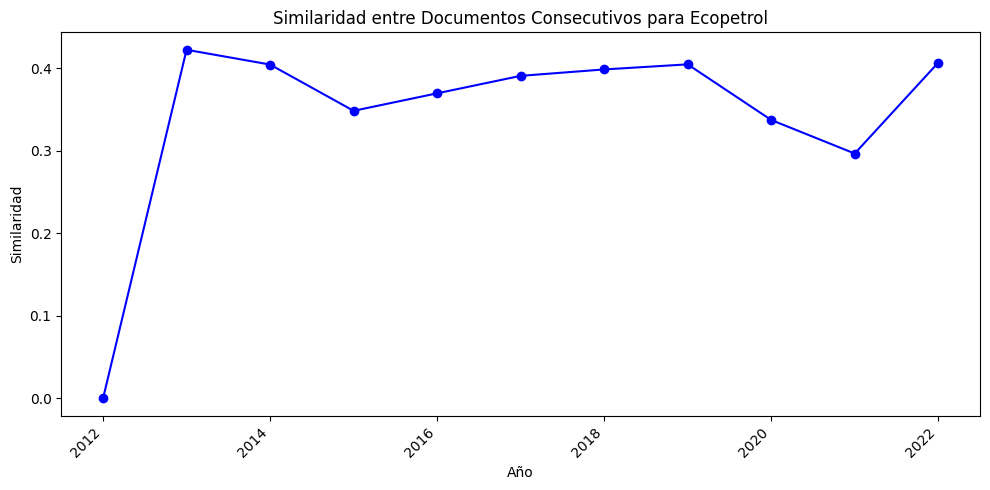

In [8]:
empresa_seleccionada = 'Ecopetrol'  # Reemplaza esto con el nombre de la empresa que se va a graficar
df_empresa_seleccionada = df[df['Empresa'] == empresa_seleccionada].sort_values(by='Año')

# Plot de empresa seleccionada
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_empresa_seleccionada['Año'], df_empresa_seleccionada['Similaridad'], marker='o', linestyle='-', color='blue')
ax.set_title(f'Similaridad entre Documentos Consecutivos para {empresa_seleccionada}')
ax.set_xlabel('Año')
ax.set_ylabel('Similaridad')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()